## Symulacja Komp

Import bibliotek

In [42]:
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chisquare
from scipy import stats
import datetime
import statsmodels.api as sm
import pylab as py
import seaborn as sns


Parametry do wyboru

In [13]:
#start variables
start_date = '2022-01-01'
stop_date = '2022-01-31'
quantity_of_boxes = 100

Parametry dane

In [14]:
time_series = pd.date_range(start=start_date,end=stop_date, freq='D') #create time series
box_kinds = np.array(['S','M','L','XL']) #box sizes
baggage_kinds = np.array(['S','M','L','XL']) #baggage sizes
uniform_dist = uniform.rvs(size=quantity_of_boxes, loc=0, scale=1) #create uniform distribution


Generowanie rozkładów

In [15]:
free_boxes = np.array([0,0,0,0]) #free boxes
for i in range(0,len(uniform_dist)): #loop through uniform distribution and assign boxes
    if uniform_dist[i] < 0.25:
        free_boxes[0] += 1
    elif uniform_dist[i] < 0.55:
        free_boxes[1] += 1
    elif uniform_dist[i] < 0.75:
        free_boxes[2] += 1
    else:
        free_boxes[3] += 1
# generate hours rented
hours_rented = np.random.normal(15,5,100) #generating normal distribution of hours rented
hours_rented_int = [ int(hours_int) for hours_int in hours_rented ] #converting to int

# generate clients per day
clients_per_day = np.random.gamma(15,1.75,100) #generating gamma distribution of clients per day
clients_per_day_int = [ int(clients_int) for clients_int in clients_per_day ] #converting to int



Testowanie wygenerowanych danych

0.33937868568570856


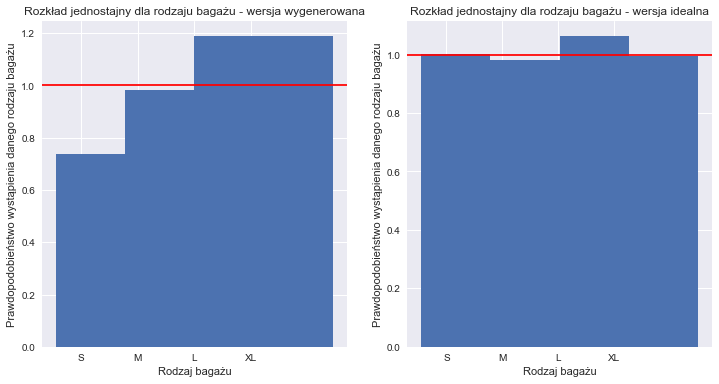

NormaltestResult(statistic=5.689809696867993, pvalue=0.05813979856951719)


C:\Users\przem\AppData\Local\Temp\ipykernel_123740\2778053965.py:46: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


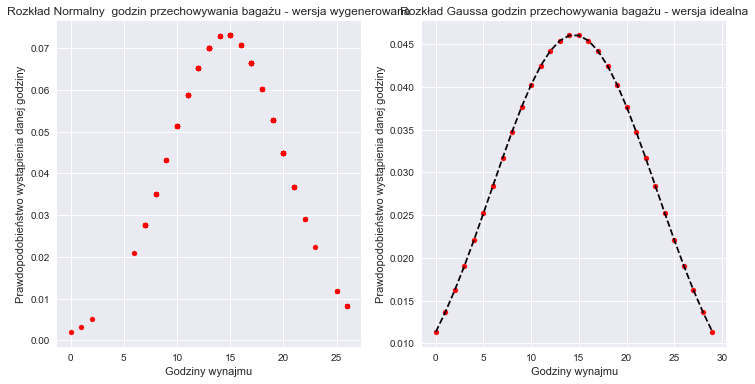

NormaltestResult(statistic=5.689809696867993, pvalue=0.05813979856951719)


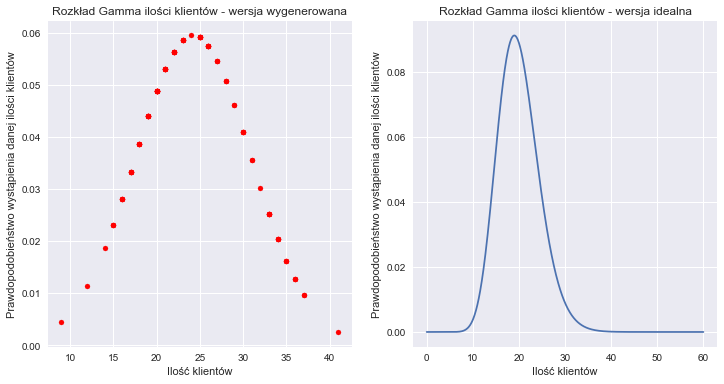

In [16]:
test_uniform_dist_of_free_boxes = chisquare(free_boxes) #test uniform distribution of free boxes
p_value_uniform_dist_of_free_boxes = test_uniform_dist_of_free_boxes[1]
print(p_value_uniform_dist_of_free_boxes)
plt.figure(figsize = (12, 6)) 
plt.subplot(1,2,1)   
plt.hist(uniform_dist,density = True,bins=4)
plt.axhline(y=uniform.pdf(uniform_dist[0]),color='r')
plt.title('Rozkład jednostajny dla rodzaju bagażu - wersja wygenerowana')
plt.ylabel('Prawdopodobieństwo wystąpienia danego rodzaju bagażu')
plt.xlabel('Rodzaj bagażu')
plt.xticks([0.1,0.3,0.5,0.7],box_kinds)

plt.subplot(1,2,2)
baggage_type = ["S", "M", "L", "XL"]
count = [0.20,0,25,0.30,0.25]
from scipy.stats import uniform

x = uniform.rvs(0.01,0.99,size=1000)     
plt.hist(x,density = True,bins=4)
plt.axhline(y=uniform.pdf(x[0]),color='r')
plt.title('Rozkład jednostajny dla rodzaju bagażu - wersja idealna')
plt.ylabel('Prawdopodobieństwo wystąpienia danego rodzaju bagażu')
plt.xlabel('Rodzaj bagażu')
plt.xticks([0.1,0.3,0.5,0.7],baggage_type)
plt.show()


test_normal_dist_of_clients = stats.normaltest(clients_per_day_int) #test normal distribution of clients per day
print(test_normal_dist_of_clients)
plt.figure(figsize = (12, 6))
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out
plt.subplot(1,2,1)
plt.title("Rozkład Normalny  godzin przechowywania bagażu - wersja wygenerowana")
plt.xlabel("Godziny wynajmu")
plt.ylabel("Prawdopodobieństwo wystąpienia danej godziny" )
# plt.hist(clients_per_day_int, density = True, bins = 10)
plt.scatter(hours_rented_int, pdf(hours_rented_int), marker = 'o', s = 25, color = 'red')

plt.subplot(1,2,2) # subplot ideal distribution
x = np.arange(0,30,1)
y = pdf(x)
plt.style.use('seaborn')
plt.title("Rozkład Gaussa godzin przechowywania bagażu - wersja idealna")
plt.xlabel("Godziny wynajmu")
plt.ylabel("Prawdopodobieństwo wystąpienia danej godziny" )
plt.plot(x, y, color = 'black',
         linestyle = 'dashed')
plt.scatter( x, y, marker = 'o', s = 25, color = 'red')
plt.show()


test_gamma_dist_of_clients_per_day = stats.normaltest(clients_per_day_int) #test gamma distribution of clients per day
print(test_gamma_dist_of_clients_per_day)
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title("Rozkład Gamma ilości klientów - wersja wygenerowana")
plt.xlabel("Ilość klientów")
plt.ylabel("Prawdopodobieństwo wystąpienia danej ilości klientów" )
plt.scatter(clients_per_day_int, pdf(clients_per_day_int), marker = 'o', s = 25, color = 'red')

plt.subplot(1,2,2) # subplot ideal distribution
x = np.linspace(0,60,1000)
y = stats.gamma.pdf(x, a=20, scale=1)

plt.title("Rozkład Gamma ilości klientów - wersja idealna")
plt.xlabel("Ilość klientów")
plt.ylabel("Prawdopodobieństwo wystąpienia danej ilości klientów" )
plt.plot(x,y)
plt.show()

Rozkład gamma Q-Q

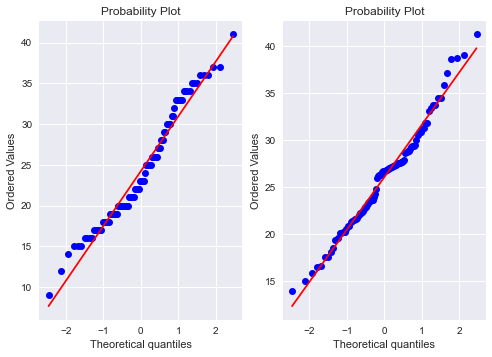

In [34]:
data_points = np.random.gamma(15,1.75,100)  
fig = plt.figure()
plt.subplot(1,2,1)
stats.probplot(clients_per_day_int, dist="norm", plot=py)

plt.subplot(1,2,2)
stats.probplot(data_points, dist="norm", plot=py)
py.show()


Po lewej stronie znajduje się wykres dotyczący rozkłakdu gamma ilości klientów w ciągu danego dnia, po prawej teoretyczny rozkład gamma.


Klasa przechowująca informacje o kliencie

In [18]:
class Clients:
    """_summary_ = 'Client class for queueing system'
    """
    def __init__(self, baggage_size,hours_rented,start_rent,starthour_rent):
        """_summary_

        Args:
            baggage_size (_type_): baggage size
            hours_rented (_type_): how many hours the client rented the box
            start_rent (_type_): start time of renting
            end_rent (_type_): end time of renting
            start_hour_rent (_type_): start hour of renting
            end_hour_rent (_type_): end hour of renting
        """
        
        self.baggage_size = baggage_size
        self.hours_rented = hours_rented
        self.start_rent = start_rent
        self.starthour_rent = starthour_rent
        self.endhour_rent = starthour_rent+hours_rented
        if self.endhour_rent > 24: #if the client rents the box for more than 24 hours, the end time is the next day
            self.endhour_rent = self.endhour_rent - 24
            self.end_rent = (pd.to_datetime(start_rent) + pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        elif self.endhour_rent <24: #if the client rents the box for less than 24 hours, the end time is the same day
            self.end_rent = start_rent
        else:
            self.end_rent = start_rent
        
    def matrix(self):
        """_summary_

        Returns:
            _type_: matrix with client data (baggage size, hours rented, start time, end time,start hour, end hour)
        """
        return np.array([[self.baggage_size],[self.hours_rented],[self.start_rent],[self.end_rent],[self.starthour_rent],[self.endhour_rent]])
    def __repr__(self):
        return 'Client with baggage size %s, rented for %s hours, from %s to %s' % (self.baggage_size, self.hours_rented, self.start_rent, self.end_rent)
    

Generowanie macierzy klientów

In [19]:

clients = [] #list of clients
def generate_clients(clients_per_day_int,hours_rented_int):
    """_summary_

    Args:
        clients_per_day_int (_type_): clients per day
        hours_rented_int (_type_): hours rented

    Returns:
        _type_: list of clients
    """
    
    for i in range(0,len(clients_per_day_int)):
        for j in range(0,clients_per_day_int[i]):
            # print(np.random.choice(baggage_kinds),np.random.choice(hours_rented_int),str((np.random.choice(time_series.strftime('%Y-%m-%d')))),np.random.randint(0,24))
            clients.append(Clients(np.random.choice(baggage_kinds),np.random.choice(hours_rented_int),str((np.random.choice(time_series.strftime('%Y-%m-%d')))),np.random.randint(0,24)))
            
    return clients

generate_clients(clients_per_day_int,hours_rented_int)
matrix_clients = np.array([client.matrix() for client in clients]) #matrix with clients data ready to be used in the simulation
print(matrix_clients)

[[['L']
  ['14']
  ['2022-01-22']
  ['2022-01-23']
  ['17']
  ['7']]

 [['S']
  ['8']
  ['2022-01-27']
  ['2022-01-27']
  ['12']
  ['20']]

 [['XL']
  ['13']
  ['2022-01-15']
  ['2022-01-16']
  ['14']
  ['3']]

 ...

 [['M']
  ['10']
  ['2022-01-08']
  ['2022-01-08']
  ['7']
  ['17']]

 [['M']
  ['13']
  ['2022-01-11']
  ['2022-01-12']
  ['12']
  ['1']]

 [['XL']
  ['13']
  ['2022-01-21']
  ['2022-01-21']
  ['4']
  ['17']]]


Klasa przechowująca informację o skrytce

In [20]:
def generate_clients(clients_per_day_int,hours_rented_int):
    """_summary_

    Args:
        clients_per_day_int (_type_): clients per day
        hours_rented_int (_type_): hours rented

    Returns:
        _type_: list of clients
    """
    
    for i in range(0,len(clients_per_day_int)):
        for j in range(0,clients_per_day_int[i]):
            # print(np.random.choice(baggage_kinds),np.random.choice(hours_rented_int),str((np.random.choice(time_series.strftime('%Y-%m-%d')))),np.random.randint(0,24))
            clients.append(Clients(np.random.choice(baggage_kinds),np.random.choice(hours_rented_int),str((np.random.choice(time_series.strftime('%Y-%m-%d')))),np.random.randint(0,24)))
            
    return clients

generate_clients(clients_per_day_int,hours_rented_int)
matrix_clients = np.array([client.matrix() for client in clients]) #matrix with clients data ready to be used in the simulation
print(matrix_clients)


#baggage class
class Cache():
    """_summary_ = Cache class for queueing system"""

    def __init__(self, size):
        """_summary_
        Args:
            size (_type_): cache size
            is_free (_type_): boolean indication status of the cache
            occupation_history (_type_): history of cache usage
        """
        self.size = size
        self.is_free = True
        self.end_hour = 0
        self.end_day = pd.to_datetime("2022-01-01").date()
        self.occupation_history = []

    def occupy(self, current_day, current_hour, end_day, end_hour):
        """_summary_ = Occupies cache for a certain number of hours
        Args:
            current_day (_type_): day in which we want to put luggage in the cache
            current_hour (_type_): hour in which we want to put luggage in the cache
            end_day (_type_): day in which we want to put luggage out of the cache
            end_hour (_type_): hour in which we want to put luggage out of the cache
        """
        if self.is_free or self.end_day < pd.to_datetime(current_day).date() or (
                self.end_day == pd.to_datetime(current_day).date() and
                self.end_hour < current_hour):
            self.occupation_history.append([current_day, current_hour, end_day, end_hour])
            self.is_free = False
            self.end_hour = end_hour
            self.end_day = pd.to_datetime(end_day).date()
            return "OK"
        else:
            return "Already occupied"
        
    def info(self):
        """_summary_ = Returns info about the cache
        Returns:
            _type_ = string with info about the cache
        """
        return "Cache size: %s, is free: %s, end hour: %s, end day: %s" % (
            self.size, self.is_free, self.end_hour, self.end_day)
    def info_detal(self):
        """_summary_ = Returns info about the cache
        Returns:
            _type_ = string with info about the cache
        """
        return (self.size, self.is_free, self.end_hour, self.end_day, self.occupation_history)



[[['L']
  ['14']
  ['2022-01-22']
  ['2022-01-23']
  ['17']
  ['7']]

 [['S']
  ['8']
  ['2022-01-27']
  ['2022-01-27']
  ['12']
  ['20']]

 [['XL']
  ['13']
  ['2022-01-15']
  ['2022-01-16']
  ['14']
  ['3']]

 ...

 [['L']
  ['15']
  ['2022-01-28']
  ['2022-01-29']
  ['21']
  ['12']]

 [['L']
  ['20']
  ['2022-01-13']
  ['2022-01-14']
  ['10']
  ['6']]

 [['S']
  ['21']
  ['2022-01-27']
  ['2022-01-28']
  ['4']
  ['1']]]


Generowanie dostępnych skrytek

In [21]:
cache1 = Cache("S")
# print(cache1.occupy("2022-01-01", 12, "2022-01-02", 13))
# print(cache1.occupy("2022-01-03", 12, "2022-01-03", 13))
# print(cache1.end_hour, cache1.end_day)
# print(cache1.occupation_history)


#generate available caches

def generate_caches(cache_sizes,quantity_of_boxes):
    """_summary_

    Args:
        cache_sizes (_type_): list of cache sizes
        quantity_of_boxes (_type_): quantity of all boxes

    Returns:
        _type_: list of caches
    """
    caches = []
    for i in range(0,(int(quantity_of_boxes/4))): #quantity of boxes divided by 4 because we have 4 sizes of boxes and we want to have the same quantity of each size
        for size in cache_sizes:
            caches.append(Cache(size))
    return caches


generated_caches = generate_caches(box_kinds,quantity_of_boxes) #list of caches ready to simulate
# print(generated_caches)
print([cache.info_detal() for cache in generated_caches])


[('S', True, 0, datetime.date(2022, 1, 1), []), ('M', True, 0, datetime.date(2022, 1, 1), []), ('L', True, 0, datetime.date(2022, 1, 1), []), ('XL', True, 0, datetime.date(2022, 1, 1), []), ('S', True, 0, datetime.date(2022, 1, 1), []), ('M', True, 0, datetime.date(2022, 1, 1), []), ('L', True, 0, datetime.date(2022, 1, 1), []), ('XL', True, 0, datetime.date(2022, 1, 1), []), ('S', True, 0, datetime.date(2022, 1, 1), []), ('M', True, 0, datetime.date(2022, 1, 1), []), ('L', True, 0, datetime.date(2022, 1, 1), []), ('XL', True, 0, datetime.date(2022, 1, 1), []), ('S', True, 0, datetime.date(2022, 1, 1), []), ('M', True, 0, datetime.date(2022, 1, 1), []), ('L', True, 0, datetime.date(2022, 1, 1), []), ('XL', True, 0, datetime.date(2022, 1, 1), []), ('S', True, 0, datetime.date(2022, 1, 1), []), ('M', True, 0, datetime.date(2022, 1, 1), []), ('L', True, 0, datetime.date(2022, 1, 1), []), ('XL', True, 0, datetime.date(2022, 1, 1), []), ('S', True, 0, datetime.date(2022, 1, 1), []), ('M', T

# Symulacja przypisań do odpowiedniej skrytki oraz maksymalnego zysku przedsiębiorstwa

## Wizualizacja oraz analiza zebranych danych

### Dane dotyczące klientów

In [149]:

clients_baggage_size = (matrix_clients[:,0]).flatten()
clients_hours_rented = matrix_clients[:,1].flatten()
clients_start_time = matrix_clients[:,2].flatten()
clients_end_time = matrix_clients[:,3].flatten()
clients_start_hour = matrix_clients[:,4].flatten()
clients_end_hour = matrix_clients[:,5].flatten()
df_clients = pd.DataFrame({'baggage_size':clients_baggage_size,'hours_rented':clients_hours_rented,'start_time':clients_start_time,'end_time':clients_end_time,'start_hour':clients_start_hour,'end_hour':clients_end_hour})
df_clients = df_clients.astype({'baggage_size': 'category','hours_rented': 'int64','start_time': 'datetime64[ns]','end_time': 'datetime64[ns]','start_hour': 'int64','end_hour': 'int64'})
df_only_numeric = df_clients.select_dtypes(include=['int64','float64'])

print(df_clients.head(20))
print(df_clients.describe())

   baggage_size  hours_rented start_time   end_time  start_hour  end_hour
0             L            14 2022-01-22 2022-01-23          17         7
1             S             8 2022-01-27 2022-01-27          12        20
2            XL            13 2022-01-15 2022-01-16          14         3
3             S            17 2022-01-03 2022-01-04          10         3
4             L            17 2022-01-25 2022-01-25           0        17
5            XL            25 2022-01-06 2022-01-07           9        10
6             S             8 2022-01-02 2022-01-03          23         7
7             L            12 2022-01-13 2022-01-14          20         8
8            XL             1 2022-01-18 2022-01-18          10        11
9             M             0 2022-01-23 2022-01-23          21        21
10            M            20 2022-01-22 2022-01-23          23        19
11            M            18 2022-01-12 2022-01-12           3        21
12           XL             7 2022-01-

Rozkad  bagaży danego rodzaju

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


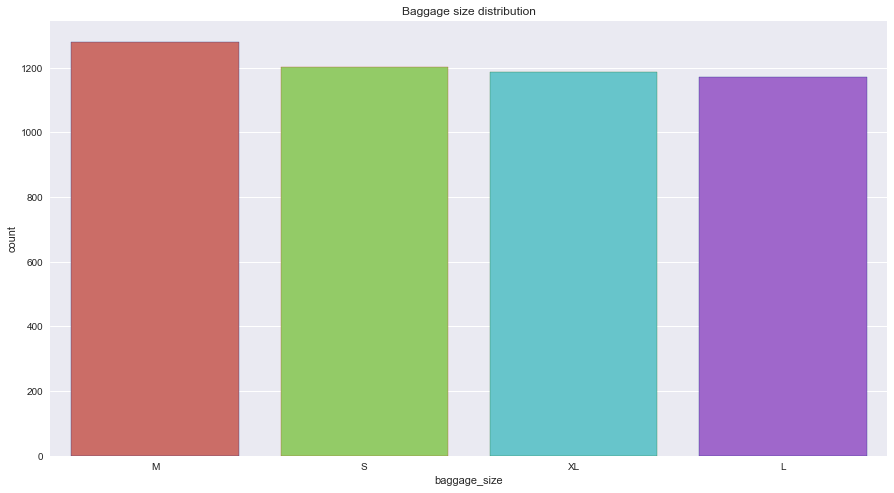

In [88]:
plt.figure(figsize=(15,8))
plt.title('Baggage size distribution')

sns.countplot(x='baggage_size',data=df_clients,palette='hls',order = df_clients['baggage_size'].value_counts().index,edgecolor=sns.color_palette("dark", 3))
plt.legend()
plt.show()



Ilość godzin wynajęcia skrytki

<AxesSubplot: title={'center': 'Hours rented distribution with baggage size'}, xlabel='hours_rented', ylabel='Count'>

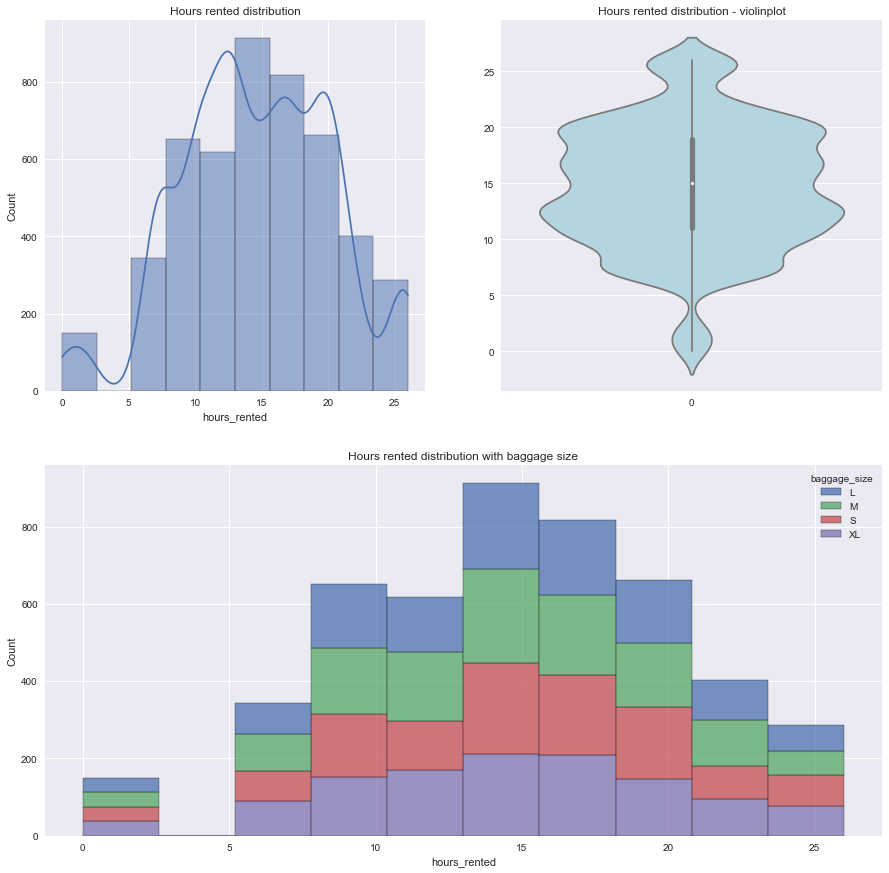

In [193]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('Hours rented distribution')
sns.histplot(df_clients['hours_rented'],kde=True,stat='count',bins=10)

plt.subplot(2,2,2)
plt.title('Hours rented distribution - violinplot')
sns.violinplot(df_clients['hours_rented'],orient='v',color='lightblue')


plt.subplot(2,1,2)
plt.title('Hours rented distribution with baggage size')
sns.histplot(data=df_clients, x="hours_rented", hue="baggage_size", multiple="stack",bins=10)



C:\Users\przem\AppData\Local\Temp\ipykernel_123740\614174987.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clients['start_hour'],shade=True)
C:\Users\przem\AppData\Local\Temp\ipykernel_123740\614174987.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clients['end_hour'],shade=True)


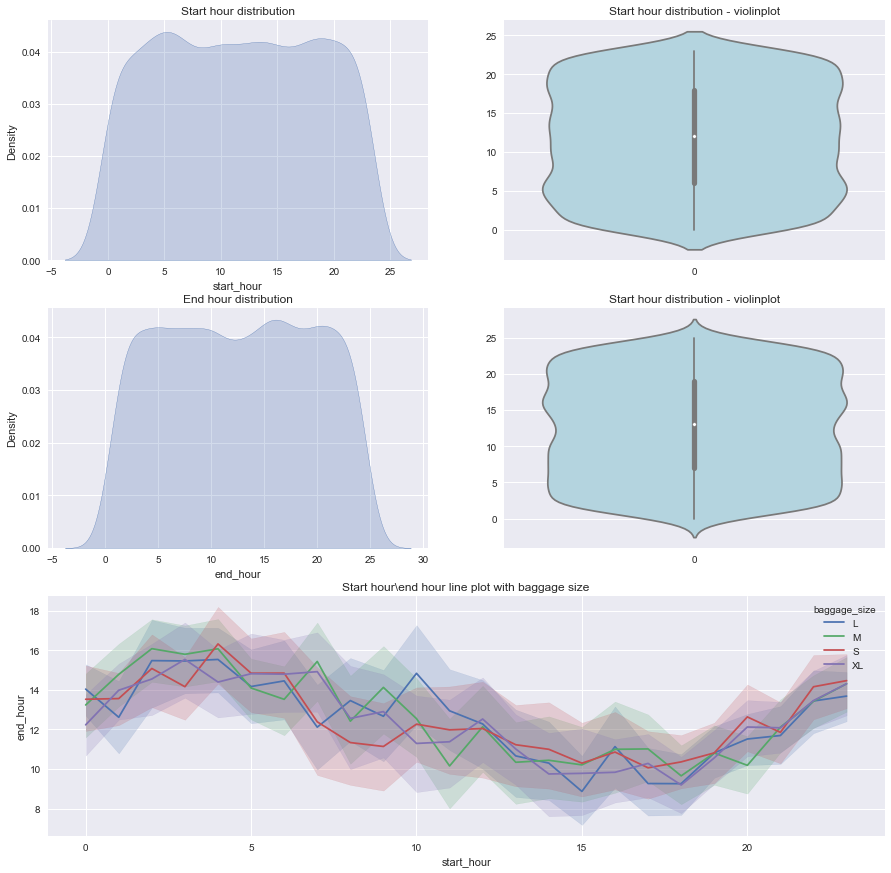

<Figure size 1800x1080 with 0 Axes>

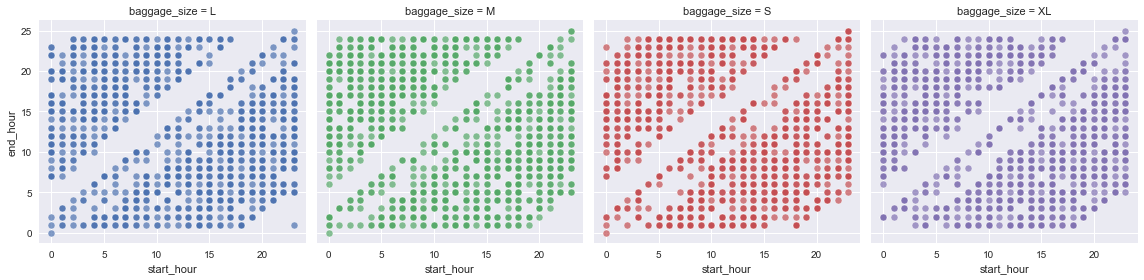

In [246]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.title('Start hour distribution')
sns.kdeplot(df_clients['start_hour'],shade=True)

plt.subplot(3,2,2)
plt.title('Start hour distribution - violinplot')
sns.violinplot(df_clients['start_hour'],orient='v',color='lightblue')

plt.subplot(3,2,3)
plt.title('End hour distribution')
sns.kdeplot(df_clients['end_hour'],shade=True)

plt.subplot(3,2,4)
plt.title('Start hour distribution - violinplot')
sns.violinplot(df_clients['end_hour'],orient='v',color='lightblue')


plt.subplot(3,1,3)
plt.title('Start hour\end hour line plot with baggage size')
sns.lineplot(data=df_clients, x="start_hour", y="end_hour", hue="baggage_size")
plt.show()
plt.figure(figsize=(25,15))
g = sns.FacetGrid(df_clients, col="baggage_size", hue="baggage_size", col_wrap=4, height=4)
g.map(sns.scatterplot, "start_hour", "end_hour", alpha=.7)

<AxesSubplot: title={'center': 'End time in interval time'}, xlabel='start_time', ylabel='end_hour'>

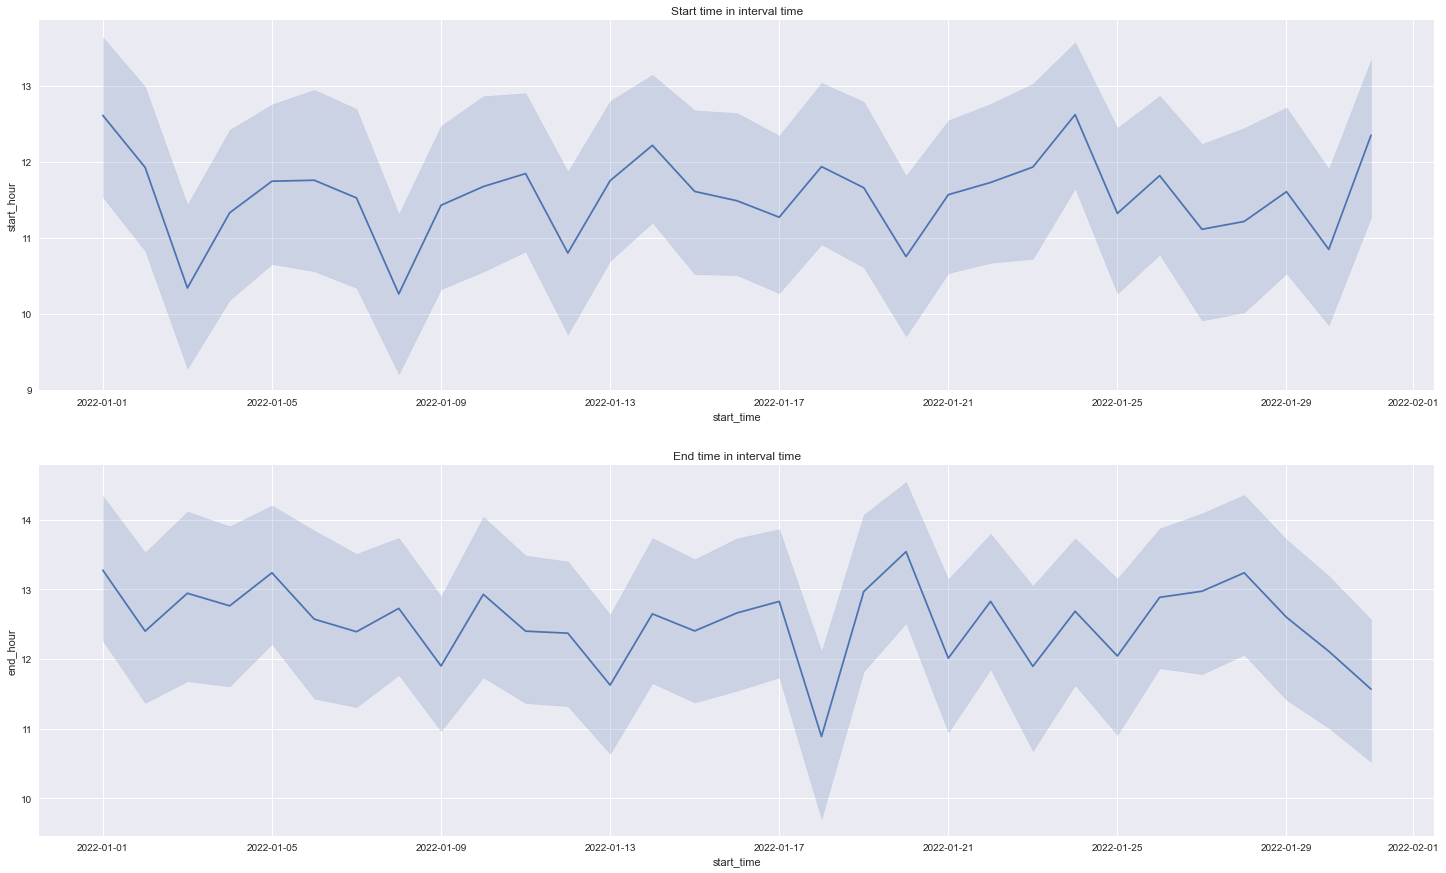

In [250]:
plt.figure(figsize=(25,15))
plt.subplot(2,1,1)
plt.title("Start time in interval time")
sns.lineplot(data=df_clients, x="start_time", y="start_hour")

plt.subplot(2,1,2)
plt.title("End time in interval time")
sns.lineplot(data=df_clients, x="start_time", y="end_hour")



Zmienne numeryczne zależności, korelacje..

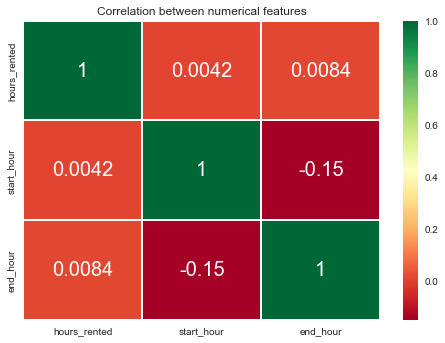

<Figure size 1440x1080 with 0 Axes>

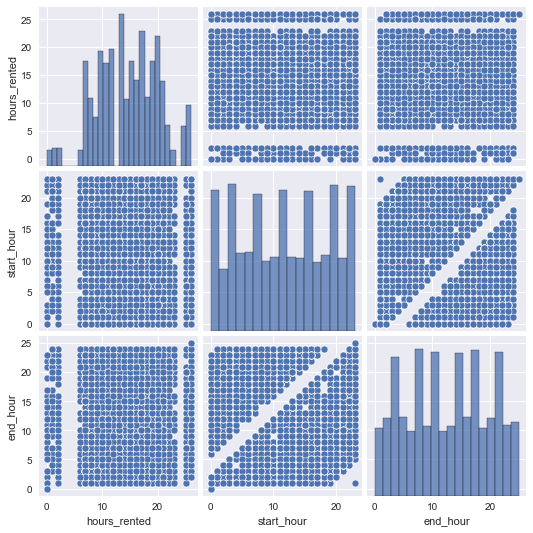

In [206]:


plt.title('Start hour distribution')
sns.heatmap(df_only_numeric.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
plt.title('Correlation between numerical features')
plt.figure(figsize=(20,15))
sns.pairplot(df_only_numeric)
plt.show()

In [253]:
print([cache.info() for cache in generated_caches if cache.occupation_history == []])

['Cache size: S, is free: True, end hour: 0, end day: 2022-01-01', 'Cache size: M, is free: True, end hour: 0, end day: 2022-01-01', 'Cache size: L, is free: True, end hour: 0, end day: 2022-01-01', 'Cache size: XL, is free: True, end hour: 0, end day: 2022-01-01', 'Cache size: S, is free: True, end hour: 0, end day: 2022-01-01', 'Cache size: M, is free: True, end hour: 0, end day: 2022-01-01', 'Cache size: L, is free: True, end hour: 0, end day: 2022-01-01', 'Cache size: XL, is free: True, end hour: 0, end day: 2022-01-01', 'Cache size: S, is free: True, end hour: 0, end day: 2022-01-01', 'Cache size: M, is free: True, end hour: 0, end day: 2022-01-01', 'Cache size: L, is free: True, end hour: 0, end day: 2022-01-01', 'Cache size: XL, is free: True, end hour: 0, end day: 2022-01-01', 'Cache size: S, is free: True, end hour: 0, end day: 2022-01-01', 'Cache size: M, is free: True, end hour: 0, end day: 2022-01-01', 'Cache size: L, is free: True, end hour: 0, end day: 2022-01-01', 'Cache